# Métodos de Ordenamiento

## ?`Qué es ordenar?
Es el proceso de recorrer y reposicionar una secuencia de objetos para dejarlos en una secuencia determinada por un criterio dado.
Este tipo de criterio es contextual y siempre va a depender de la aplicación que queramos darle, como por ejemplo:

 - Fecha de nacimiento
 - Número de RUT
 - Valor absoluto
 
\textcolor{red}{?`Por qué es interesante analizar los métodos de ordenamiento?}
Porque son procesos costosos y críticos en cualquier sistema computacional.

## Algoritmo de Ordenamiento Burbuja (Bubble sort)
Este método compara exhaustivamente cada posición del arreglo con la siguiente, si no estan ordenadas las intercambia. Este proceso lo repite $n$ veces, donde $n$ es el tamaño del arreglo. En cada iteración, el elemento mayor queda en su posición final. En el código definimos una función swap, que realizará el intercambio cuando sea necesario (#C1). El algoritmo burbuja propiamente tal, lo podemos ver en #C2.

In [1]:
# C1: función swap para el intercambio de elementos en 
# un array A las posiciones x e y.
def swap(A,x,y):
    print("Posición "+str(x)+" por posición "+str(y))
    print(A)
    aux=A[x]
    A[x]=A[y]
    A[y]=aux

# C2: función burbuja
def burbuja(A):
    n=len(A)
    for i in range(1,n):
        for j in range(1,n):
            if A[j]<A[j-1]:
                swap(A,j,j-1)
                

Algunas mejoras que se le pueden aplicar a este algoritmo son:

 - Acortar la iteración en $j$, dado que el último elemento siempre estará ordenado, como veremos más adelante.
 - Colocar una bandera que indique si se realizo algún intercambio, en caso contrario, detiene la ejecución pues este ha finalizado.

In [2]:
def burbuja_mejorado(A):
    n=len(A)
    for i in range(1,n):
        flag=false
        for j in range(1,n-i-1):
            if A[j]<A[j-1]:
                flag=true
                swap(A,j,j-1)
                
        if not flag:
            break
            

Para observar como funciona este algoritmo paso a paso, crearemos un arreglo desordenado. Cada linea contendrá, que es lo que hay que cambiar y el estado actual del arreglo. Para este caso solo hemos considerado mostrar cuando se realiza un intercambio para evitar una traza demasiado extensa.

In [3]:
arreglo=[15,5,8,9,3,2,7,18,12]
burbuja(arreglo)
print ("Resultado final")
print (arreglo)

Posición 1 por posición 0
[15, 5, 8, 9, 3, 2, 7, 18, 12]
Posición 2 por posición 1
[5, 15, 8, 9, 3, 2, 7, 18, 12]
Posición 3 por posición 2
[5, 8, 15, 9, 3, 2, 7, 18, 12]
Posición 4 por posición 3
[5, 8, 9, 15, 3, 2, 7, 18, 12]
Posición 5 por posición 4
[5, 8, 9, 3, 15, 2, 7, 18, 12]
Posición 6 por posición 5
[5, 8, 9, 3, 2, 15, 7, 18, 12]
Posición 8 por posición 7
[5, 8, 9, 3, 2, 7, 15, 18, 12]
Posición 3 por posición 2
[5, 8, 9, 3, 2, 7, 15, 12, 18]
Posición 4 por posición 3
[5, 8, 3, 9, 2, 7, 15, 12, 18]
Posición 5 por posición 4
[5, 8, 3, 2, 9, 7, 15, 12, 18]
Posición 7 por posición 6
[5, 8, 3, 2, 7, 9, 15, 12, 18]
Posición 2 por posición 1
[5, 8, 3, 2, 7, 9, 12, 15, 18]
Posición 3 por posición 2
[5, 3, 8, 2, 7, 9, 12, 15, 18]
Posición 4 por posición 3
[5, 3, 2, 8, 7, 9, 12, 15, 18]
Posición 1 por posición 0
[5, 3, 2, 7, 8, 9, 12, 15, 18]
Posición 2 por posición 1
[3, 5, 2, 7, 8, 9, 12, 15, 18]
Posición 1 por posición 0
[3, 2, 5, 7, 8, 9, 12, 15, 18]
Resultado final
[2, 3, 5, 7, 8,

### Mejor Caso
En el mejor de los casos, cuando el arreglo esta ordenado, el algoritmo burbuja realiza todas las comparaciones $O(n^2)$, mientras que el mejorado, se detiene despues de la primera iteración $O(n)$. En ambos casos no realiza intercambios.

### Peor Caso
En el peor de los casos, cuando el arreglo está ordenado con el criterio inverso al solicitado, el algoritmo realiza todas las comparaciones posibles $O(n^2)$ y tambien todos los intercambios $O(n^2)$.

### Caso Promedio
El caso promedio es el más dificil de manejar, ya que debemos generalizar el comportamiento del algoritmo. Para ello trabajaremos en base al algoritmo burbuja y tendremos ciertos supuestos que nos ayudarán:

 - Supondremos que la probabilidad de encontrarnos en un momento determinado en cualquier iteración es la misma, es decir: $$P(i)=\frac{1}{n-1}$$
 - Además, como el algoritmo puede terminar de forma temprana (por acción de la bandera), pudiendo ser $i$ mayor que el momento donde este acaba, supondremos una función $C(i)$ que calcula el número de comparaciónes hasta la iteración $i$.
 
De esta manera, el tiempo requerido para resolver el algoritmo burbuja en cualquier momento $n$ es:

\begin{equation*}\tag{1}\label{eq:1}
T(n)=\frac{1}{n-1}\sum_{i=1}^{n-1} C(i)
\end{equation*}

Dado que no conocemos el comportamiento de $C(i)$, debemos calcularlo en base a las cosas que conocemos del comportamiento del algoritmo. Ya que el comportamiento general del algoritmo indica que en su primera iteración realizará $n-1$ comparaciones, $n-2$ en la segunda, $n-3$ en la tercera y $n-i$ de forma general, podemos deducir que:
$$C(i)=\sum_{j=n-1}^{n-i} j$$
$$C(i)=\sum_{j=n-i}^{n-1} j$$
$$C(i)=\sum_{j=1}^{n-1} j - \sum_{j=1}^{n-i-1} j$$
$$C(i)=\frac{(n-1)n}{2} - \frac{n^2-2ni+i^2-n+i}{2}$$
\begin{equation*}\tag{2}\label{eq:2}
C(i)=\frac{2ni-i^2-i}{2} = ni-\frac{i^2}{2}-\frac{i}{2}
\end{equation*}

Reemplazando el valor de $C(i)$ (ecuación \ref{eq:2}), en $T(n)$ (ecuación \ref{eq:1}) tenemos que:
$$T(n)=\frac{1}{n-1}\sum_{i=1}^{n-1} ni-\frac{i^2}{2}-\frac{i}{2}$$
$$T(n)=\frac{1}{n-1}\left(\sum_{i=1}^{n-1} ni - \sum_{i=1}^{n-1} \frac{i^2}{2} - \sum_{i=1}^{n-1} \frac{i}{2}\right)$$
$$T(n)=\frac{1}{n-1} \left( n \sum_{i=1}^{n-1} i - \frac{1}{2} \sum_{i=1}^{n-1} i^2 - \frac{1}{2} \sum_{i=1}^{n-1} i\right)$$
$$T(n)=\frac{1}{n-1} \left( n \frac{(n-1)n}{2} - \frac{1}{2} \frac{(n-1)n(2n-1)}{6} - \frac{1}{2} \frac{(n-1)n}{2} \right)$$
$$T(n)= \frac{n^2}{2} - \frac{2n^2-n}{12} - \frac{n}{4}$$
$$T(n)= \frac{n^2}{3} - \frac{n}{6}$$
$$T(n) \sim \frac{n^2}{3} $$
$$T(n)=O(n^2)$$


### Análisis experimental
Este comportamiento cuadrático podemos verlo refrendado experimentalmente haciendo uso de un simple script en python. Incluimos las librerias de python para manejar funciones matemáticas (numpy), para graficar (matplotlib), para generar números aleatorios (random) y para tomar tiempo de ejecución (time). Además, redefinimos la función auxiliar swap y burbuja.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import time as tm
import scipy as sp

def swap(A,x,y):
    aux=A[x]
    A[x]=A[y]
    A[y]=aux

def burbuja(A):
    n=len(A)
    for i in range(1,n):
        for j in range(1,n):
            if A[j]<A[j-1]:
                swap(A,j,j-1)
                

Definimos el arreglo donde se guardarán los números a ordenar, un arreglo con los tamaños de los arreglos a ordenar y un arreglo para guardar los tiempos de ejecución.


In [9]:
arreglo=[]
sizes=[64,128,256,512,1024,2048,4096,8192]
tiempos=[]

En el siguiente ciclo se generarán los arreglos con números aleatorios (#C3), se ordenarán con burbuja tomando sus tiempos (#C4) y luego se descartarán para pasar al siguiente tamaño en el arreglo sizes (#C5). <font color="red">OJO: dependiendo del tamaños de los arreglos el siguiente bloque podría tomar un tiempo considerable en terminar. Como referencia, con burbuja un arreglo de 65536 elementos demora aproximadamente 10 minutos en un pc de escritorio.</font>

In [10]:
for curr_size in sizes:
    # C3: generación de los arreglos aleatorios
    for i in range(0,curr_size):
        arreglo.append(rnd.randint(1,200000))
    
    # C4: llamada a burbuja y toma de tiempos
    tiempo_inicial=tm.time()
    burbuja(arreglo)
    tiempo_final=tm.time()
    tiempos.append(tiempo_final-tiempo_inicial)
    
    # C5: se descarta el arreglo actual para pasar a la
    # siguiente iteración
    del arreglo
    arreglo=[]
    
print (sizes)
print (tiempos)

[64, 128, 256, 512, 1024, 2048, 4096, 8192]
[0.0012710094451904297, 0.005742073059082031, 0.019527196884155273, 0.0714719295501709, 0.2037220001220703, 0.7347419261932373, 3.1318788528442383, 12.379318952560425]


Finalmente gráficamos los tiempos a través de la librería matplotlib. Los puntos corresponden a las coordenadas sizes x tiempos y la linea es la aproximación a través de una función cuadrática. Podemos ver que obtenemos el comportamiento esperado para el ordenamiento tipo burbuja.


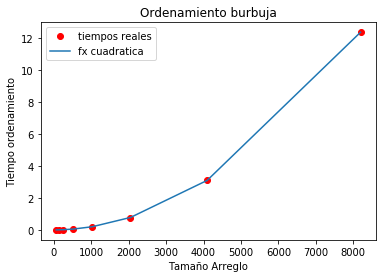

In [11]:
aproximacion=sp.polyfit(sizes,tiempos,2)

plt.plot(sizes, tiempos, "or", label='tiempos reales')
plt.plot(sizes, sp.polyval(aproximacion,sizes), label='fx cuadratica')
plt.xlabel('Tamaño Arreglo')
plt.ylabel('Tiempo ordenamiento')

plt.title('Ordenamiento burbuja')

plt.legend(loc='best')

plt.show()